# Which T-test to Use? 
## Let's find out!
### There are two main types of test tests:
#### Paired and Unpaired
#### Paired= useful for before and after results with the same test subjects. Ex: Blood pressure before and after results of a blood pressue pill. Before and After measurement = Paired T-Test
#### Unpaired= Group A = Height. Group B= Height. Subcategories for unpaired T-test: 1 assumes variation between height measurements of group A is same as group B. This is a t-test that assumes equal variatiation. Another subcategority does not assume the variation in group A and B are the same. This test is slightly more conservative and therefore recommended. If data can pass this more conservative measurement then your data is super solid. Recommendation for unpaired T-test? Go for the test that does not assume equal variance. 

### What about one and two tailed T Test?
#### A two-sided t-test. Group A and Group B, a two tailed T test would test to see if Group A is higher than Group B and test to see if it signifigantly smaller than Group B, it test TWO conditions. It is agnostic to the data, it has no idea if group A should be taller than group B. I'm going to test both sides and which one  group A is. 

#### A one tailed T-test is a lot less conservative. It requires you to decide which direction the data is going to go. It says I know which way this data is going to be. And this generally is not recommended, typically you want the data to speak for itself. 

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.preprocessing import scale

from scipy import stats
import researchpy as rp

In [3]:
bp_reading = pd.read_csv('datasets/blood_pressure.csv')

In [4]:
bp_reading.sample(10)

,patient,sex,agegrp,bp_before,bp_after
71,72,Female,30-45,157,135
24,25,Male,46-59,164,160
66,67,Female,30-45,154,134
79,80,Female,30-45,142,135
96,97,Female,46-59,144,169
97,98,Female,46-59,142,145
51,52,Male,60+,175,160
86,87,Female,46-59,143,148
109,110,Female,60+,163,154
102,103,Female,60+,147,149


In [5]:
bp_reading.shape

(120, 5)

In [7]:
bp_reading.describe().T

,count,mean,std,min,25%,50%,75%,max
patient,120.0,60.500000,34.785054,1.0,30.75,60.5,90.25,120.0
bp_before,120.0,156.450000,11.389845,138.0,147.00,154.5,164.00,185.0
bp_after,120.0,151.358333,14.177622,125.0,140.75,149.5,161.00,185.0


<Axes: >

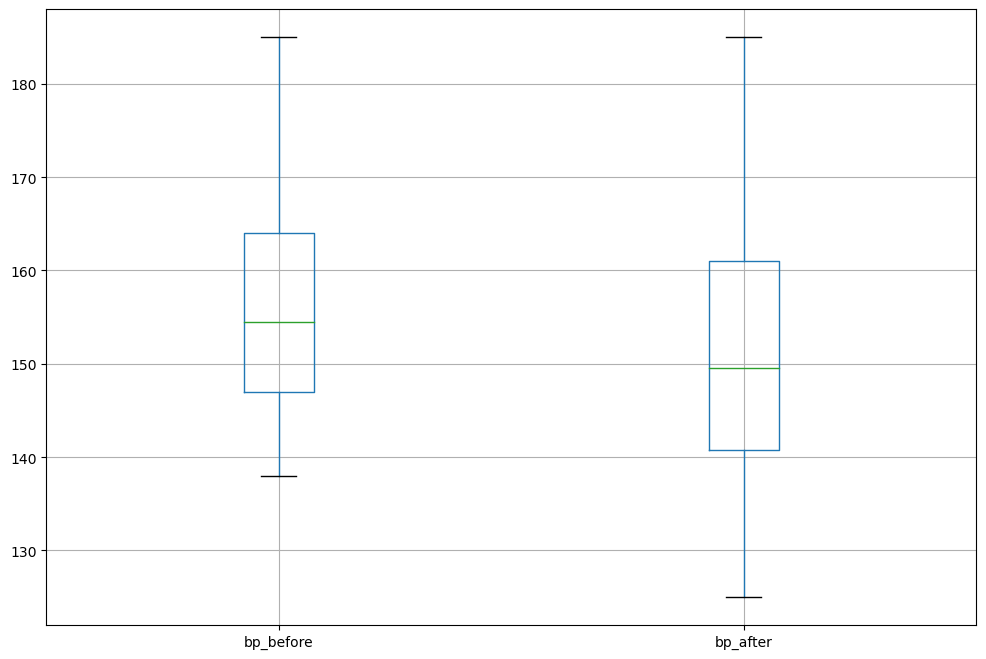

In [9]:
bp_reading[['bp_before','bp_after']].boxplot(figsize=(12,8))

In [10]:
stats.levene(bp_reading['bp_after'], bp_reading['bp_before'])

LeveneResult(statistic=4.863729003161597, pvalue=0.028383666362347747)

In [12]:
bp_reading['bp_diff'] = scale(bp_reading['bp_after'] - bp_reading['bp_before']) 

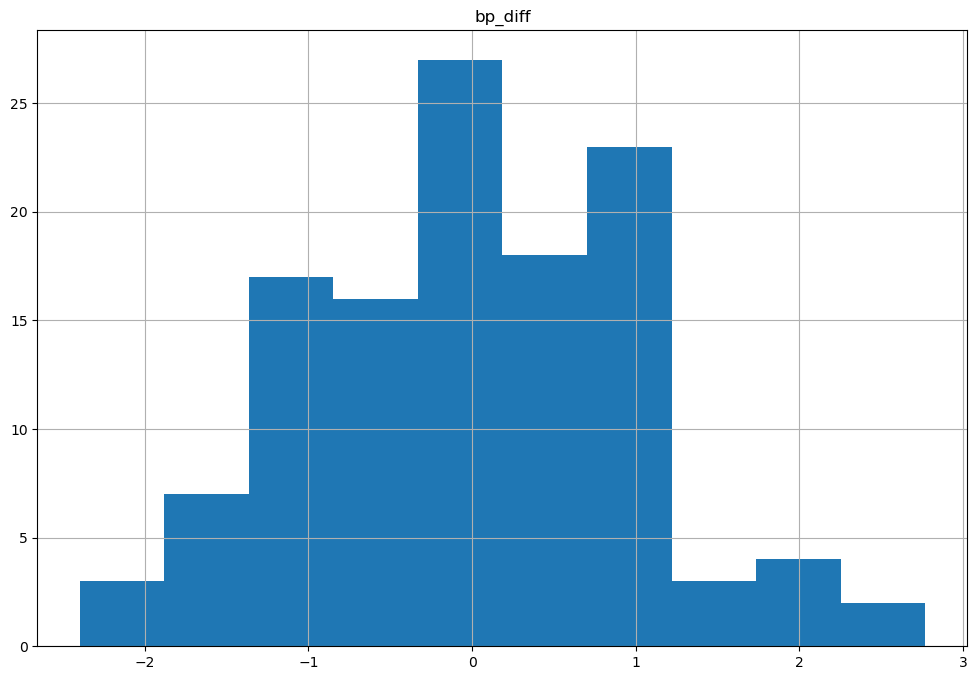

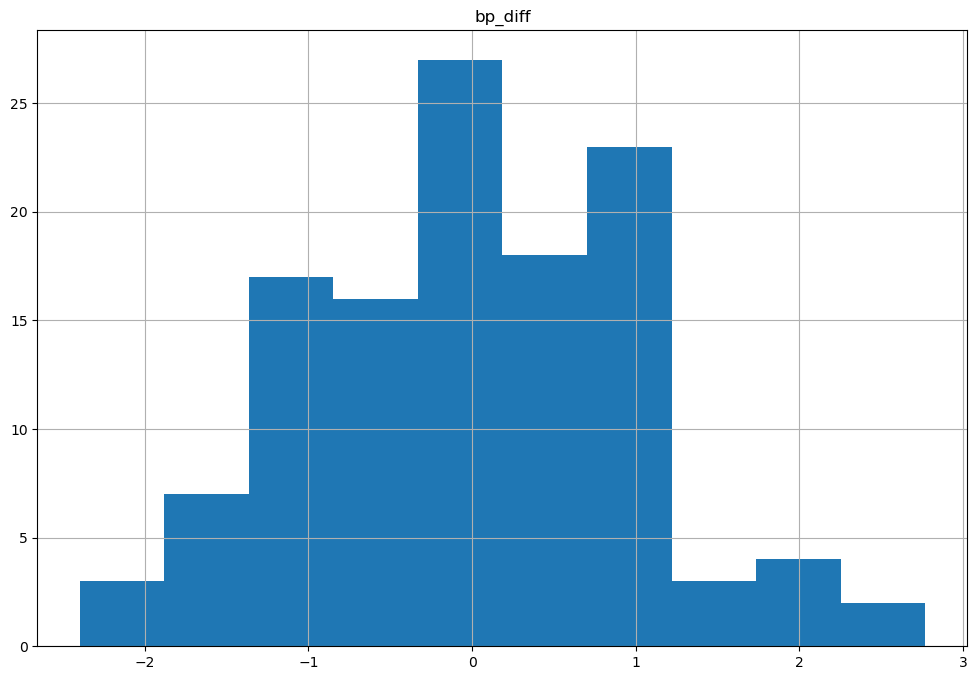

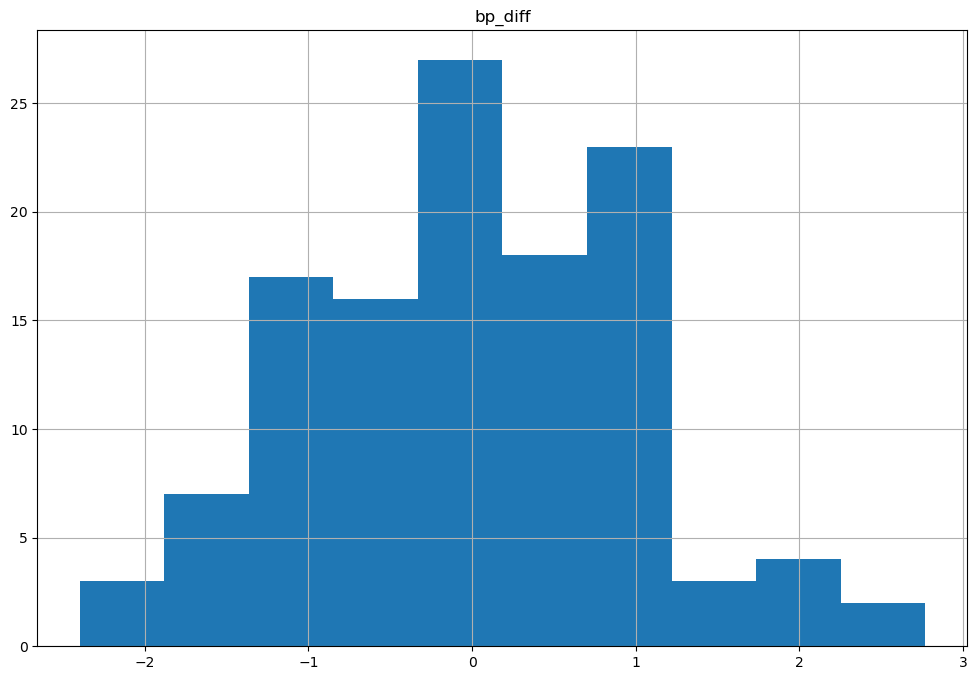

In [16]:
bp_reading[['bp_diff']].hist(figsize=(12,8))
plt.show()

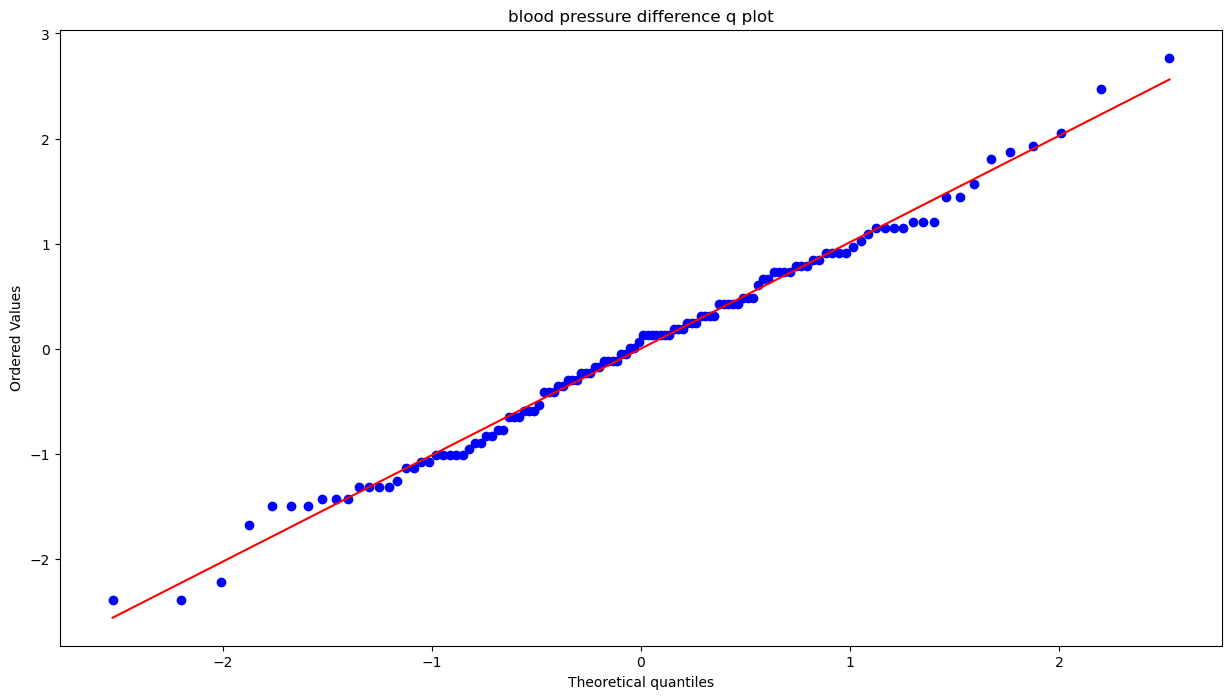

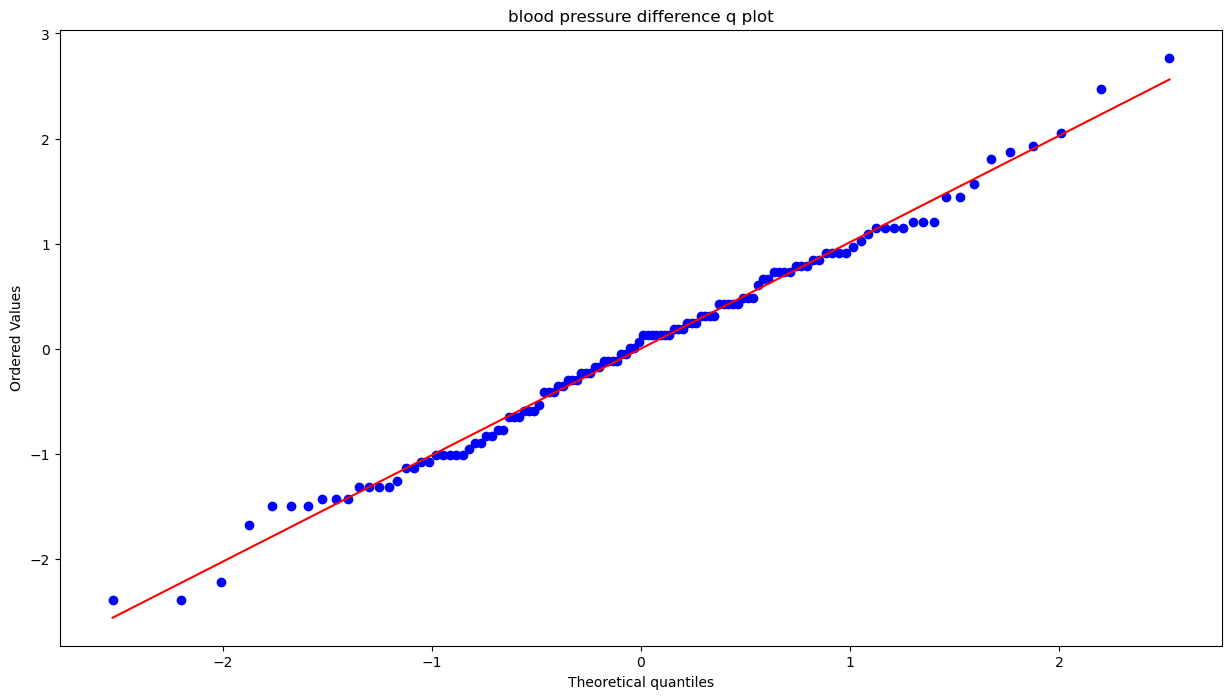

In [18]:
plt.figure(figsize=(15,8))
stats.probplot(bp_reading['bp_diff'], plot=plt)

plt.title('blood pressure difference q plot')
plt.show()

In [19]:
stats.shapiro(bp_reading['bp_diff'])

ShapiroResult(statistic=0.9926842451095581, pvalue=0.7841846942901611)

In [21]:
stats.ttest_rel(bp_reading['bp_after'], bp_reading['bp_before'])

TtestResult(statistic=-3.3371870510833657, pvalue=0.0011297914644840823, df=119)

In [22]:
### reject null hypothesis ttest = -3.33

In [26]:
rp.ttest(bp_reading['bp_after'], bp_reading['bp_before'],
        paired = True, equal_variances=False)

C:\Users\aerap\anaconda3\lib\site-packages\researchpy\ttest.py:38: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  groups = group1.append(group2, ignore_index= True)


(       sign  obs  sum ranks  expected
 0  positive   43     2406.5    3625.0
 1  negative   73     4843.5    3625.0
 2      zero    4       10.0      10.0
 3       all  120     7260.0    7260.0,
   Wilcoxon signed-rank test      results
 0      Mean for bp_after =    151.358333
 1     Mean for bp_before =    156.450000
 2                W value =   2406.500000
 3                Z value =     -3.192000
 4                p value =      0.001400
 5        Rank-Biserial r =     -0.335700
 6              Pearson r =     -0.291400)

In [27]:
y =0.29*.29

In [28]:
y

0.0841